In [224]:
import tensorflow as tf
from tensorflow import keras
from keras.applications.inception_v3 import InceptionV3
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout

In [225]:
from keras.utils import image_dataset_from_directory
from keras.layers import Rescaling

BATCH_SIZE = 64
IMG_SIZE = (128, 128) 
val_split = 0.3
labels = [0,1,2,3,4,5,6,7,8,9]
train_dir = r"C:/Users/james/Desktop/Diss_Code_for_AUC/auc_distracted_driver_dataset_v2/v2_cam1_cam2_split_by_driver/Camera_1/train/"
train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE, 
                                             validation_split = val_split, 
                                             subset= "training", 
                                             seed = 1,
                                             label_mode="categorical", 
                                             labels="inferred")

val_dataset = image_dataset_from_directory(train_dir,
                                           shuffle=True,
                                           batch_size=BATCH_SIZE,
                                           image_size=IMG_SIZE, 
                                           validation_split= val_split, 
                                           subset= "validation", 
                                           seed = 1, 
                                           label_mode="categorical",
                                           labels="inferred")

Found 11678 files belonging to 10 classes.
Using 8175 files for training.
Found 11678 files belonging to 10 classes.
Using 3503 files for validation.


In [226]:
total_batches = len(val_dataset)
val_batches = int(total_batches*(2/3))
test_batches = total_batches-val_batches

val = val_dataset.take(val_batches)
test_dataset = val_dataset.skip(val_batches)

In [227]:
def normalize(image, label):
    image = tf.cast(image/255.0, tf.float32)
    return image, label
train_dataset = train_dataset.map(normalize)
val_dataset = val.map(normalize)
test_dataset = test_dataset.map(normalize)

In [228]:
model = Sequential()

In [229]:
InceptionV3_pt_Model= InceptionV3(include_top=False,

                    input_shape=(128, 128,3),

                   pooling='max', classes=10,

                   weights ='imagenet')

for layers in InceptionV3_pt_Model.layers:
    layers.trainable = False

In [230]:
model.add(InceptionV3_pt_Model)
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
optimizerAdam = keras.optimizers.Adam(learning_rate=0.0001)
optsdg = keras.optimizers.SGD(learning_rate=0.0001)
rmsOpt = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(loss="categorical_crossentropy", optimizer=rmsOpt, metrics=["accuracy"])
model.summary()


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 dense_43 (Dense)            (None, 128)               262272    
                                                                 
 dense_44 (Dense)            (None, 64)                8256      
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_45 (Dense)            (None, 10)                650       
                                                                 
Total params: 22,073,962
Trainable params: 271,178
Non-trainable params: 21,802,784
_________________________________________________________________


In [231]:
fitted_resnet = model.fit(train_dataset, epochs=25, validation_data=val_dataset)

Epoch 1/25


128/128 [==============================] - 132s 997ms/step - loss: 2.3161 - accuracy: 0.2329 - val_loss: 1.8917 - val_accuracy: 0.3498
Epoch 2/25
128/128 [==============================] - 122s 947ms/step - loss: 1.8071 - accuracy: 0.3806 - val_loss: 1.5521 - val_accuracy: 0.4770
Epoch 3/25
128/128 [==============================] - 117s 908ms/step - loss: 1.5064 - accuracy: 0.4932 - val_loss: 1.2933 - val_accuracy: 0.6220
Epoch 4/25
128/128 [==============================] - 116s 901ms/step - loss: 1.2731 - accuracy: 0.5810 - val_loss: 1.0693 - val_accuracy: 0.7005
Epoch 5/25
128/128 [==============================] - 120s 929ms/step - loss: 1.0692 - accuracy: 0.6536 - val_loss: 0.9000 - val_accuracy: 0.7465
Epoch 6/25
128/128 [==============================] - 139s 1s/step - loss: 0.8926 - accuracy: 0.7240 - val_loss: 0.7765 - val_accuracy: 0.7730
Epoch 7/25
128/128 [==============================] - 124s 963ms/step - loss: 0.7830 - accuracy: 0.7562 - val_loss: 0.6518 - val_accuracy:

In [232]:
model.save('auc_InceptionV3_Final.h5')

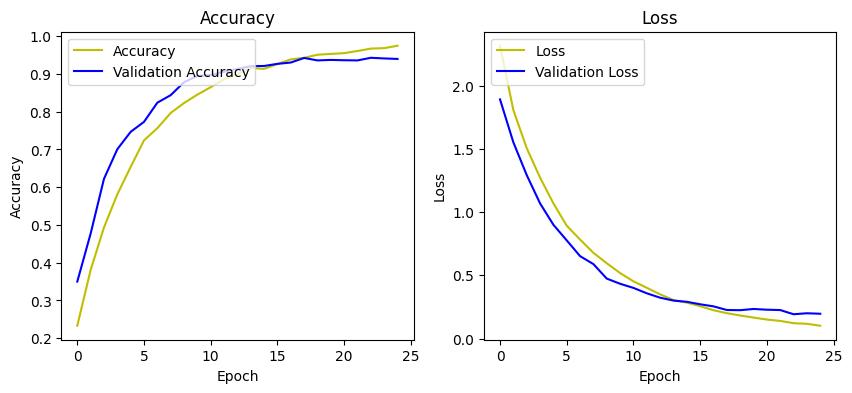

In [233]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,4))
ax = plt.subplot(1,2,1)
plt.plot(fitted_resnet.history["accuracy"], color="y", label="Accuracy")
plt.plot(fitted_resnet.history["val_accuracy"], color="b", label="Validation Accuracy")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(loc = "upper left")
ax = plt.subplot(1,2,2)
plt.plot(fitted_resnet.history["loss"], color="y", label="Loss")
plt.plot(fitted_resnet.history["val_loss"], color="b", label="Validation Loss")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(loc = "upper left")
plt.show()

In [234]:
meta = {'c0': "Focussed",
         'c1' : "V-Phone Right",
           'c2': "C-Phone Right", 
           'c3': "V-Phone Left", 
           'c4': "C-Phone Left", 
           'c5': "Radio", 
           'c6': "Drinking", 
           'c7': "Back Seat Reach", 
           'c8': "Manual", 
           'c9': "Visual"
}

In [235]:
train_dir = r"C:/Users/james/Desktop/Diss_project_code/state-farm-distracted-driver-detection/imgs/train/"
SF_test_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE, 
                                             validation_split= 0.1, 
                                             subset= "validation", 
                                             seed = 1, 
                                             labels="inferred")
def normalize(image, label):
    image = tf.cast(image/255.0, tf.float32)
    return image, label
SF_test_dataset = SF_test_dataset.map(normalize)

Found 20251 files belonging to 10 classes.
Using 2025 files for validation.


In [236]:
from sklearn.metrics import accuracy_score
y_test = []
y_pred = []
for images, labels in test_dataset:
    y_test.extend(tf.argmax(labels, axis=1))
    predictions = model.predict(images)
    y_pred.extend(tf.argmax(predictions, axis=1))

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

2/2 [==============================] - 2s 182ms/step
0.9241034195162635


In [237]:
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score, confusion_matrix
f1 = f1_score(y_test, y_pred, average="weighted")
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
print("f1:        " + str(f1))
print("Precision: " + str(precision))
print("recall:    " + str(recall))

f1:        0.9226159740885246
Precision: 0.926618029939309
recall:    0.9241034195162635


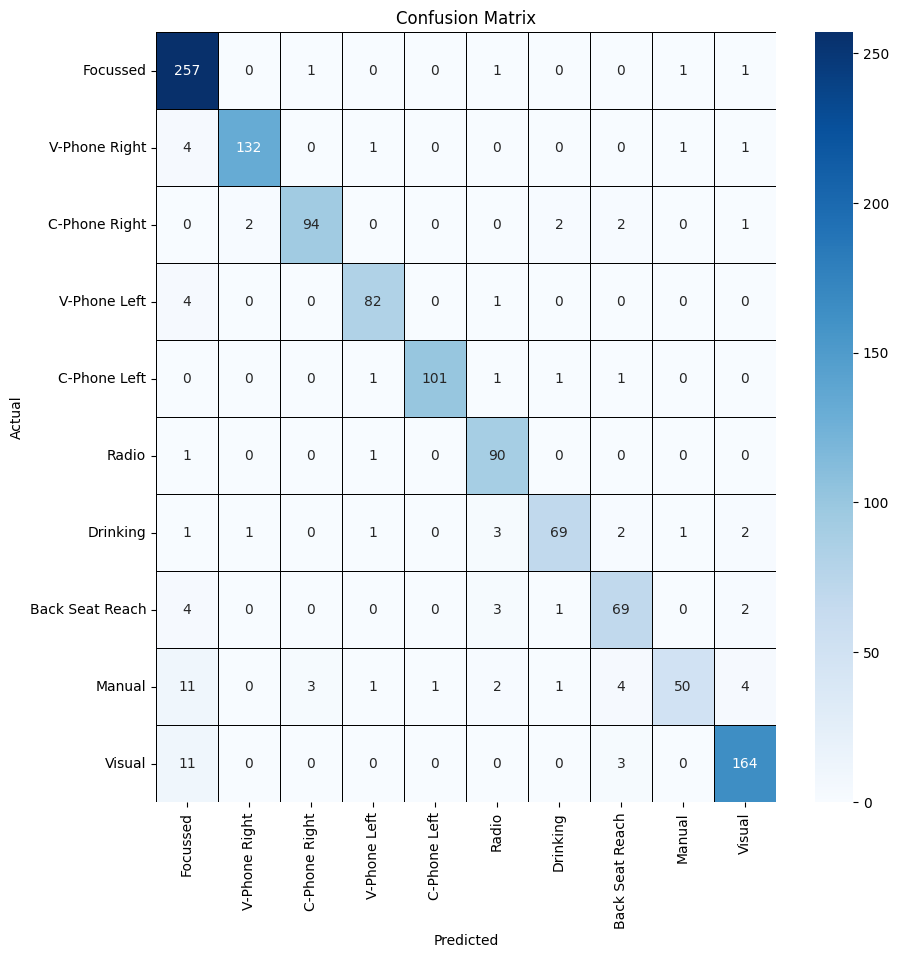

In [238]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
ticks = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5, 9.5]
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))

sns.heatmap(confusion, cmap="Blues", annot=True, fmt = ".5g", cbar=True, linewidths = 0.5,linecolor="black")
plt.xticks(ticks=ticks, labels=list(meta.values()), rotation=90)
plt.yticks(ticks=ticks, labels=list(meta.values()), rotation=-0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [239]:
from sklearn.metrics import accuracy_score
y_test_SF = []
y_pred_SF = []
for images, labels in SF_test_dataset:
    y_test_SF.extend(labels)
    predictions = model.predict(images)
    y_pred_SF.extend(tf.argmax(predictions, axis=1))

accuracy = accuracy_score(y_test_SF, y_pred_SF)
print(accuracy)

2/2 [==============================] - 0s 129ms/step
0.17777777777777778


In [240]:
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score, confusion_matrix
f1 = f1_score(y_test_SF, y_pred_SF, average="weighted")
precision = precision_score(y_test_SF, y_pred_SF, average="weighted")
recall = recall_score(y_test_SF, y_pred_SF, average="weighted")
print("f1:        " + str(f1))
print("Precision: " + str(precision))
print("recall:    " + str(recall))

f1:        0.1558904910149493
Precision: 0.1947638738037047
recall:    0.17777777777777778


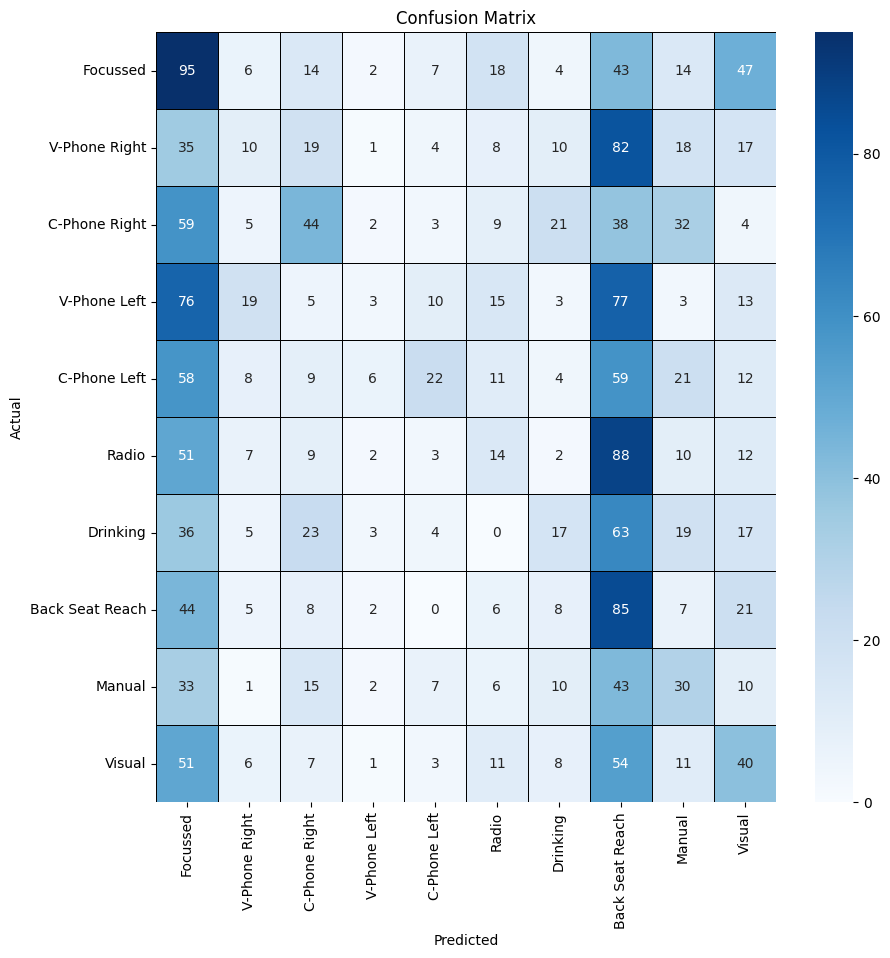

In [241]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
ticks = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5, 9.5]
confusion = confusion_matrix(y_test_SF, y_pred_SF)
plt.figure(figsize=(10,10))

sns.heatmap(confusion, cmap="Blues", annot=True, fmt = ".5g", cbar=True, linewidths = 0.5,linecolor="black")
plt.xticks(ticks=ticks, labels=list(meta.values()), rotation=90)
plt.yticks(ticks=ticks, labels=list(meta.values()), rotation=-0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()